In [204]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
import librosa
from tqdm.notebook import tqdm
from IPython.display import Audio
from pandas.api.types import is_numeric_dtype

TS_DATASET_FOLDER = os.path.join("..", "dataset")
TS_PREPROC_FOLDER = os.path.join(TS_DATASET_FOLDER, "preprocessed_traces")
DF_PREPROC_FILE = os.path.join(TS_PREPROC_FOLDER, "preproc_ts.df")

INTERESTING_TRACES = [ "syllables_02_sc", "std_phon_trace", 'spectral_centroid']
INTERESTING_TRACES += [f"syllables_{i}_ts" for i in range(7)]

## Save folder for long-run estimators
ESTIMATORS_FOLDER = os.path.join("..", "estimators")
# matplotlib.rcParams['figure.figsize'] = (10, 5)

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import default_style

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import

In [205]:
df = pd.read_csv(DF_PREPROC_FILE)
df.drop(columns=["fourier_coeffs", "path", "filtered_fourier_coeffs"], inplace=True)

categorical_attributes = [col for col in df.columns if not is_numeric_dtype(df[col])]


traces = dict()
for t in INTERESTING_TRACES:
    traces[t] = np.load(os.path.join(TS_PREPROC_FOLDER, f"{t}.npy"), allow_pickle=True)

# traces["syll_labels"] = np.repeat(np.arange(7), len(traces["syllables_fourier"])//7)

# print(traces["syll_labels"].shape)

## Metrics

In [206]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist

In [207]:
mat_euclidean = cdist(np.stack(traces["std_phon_trace"])[:10],np.stack(traces["std_phon_trace"])[:10])

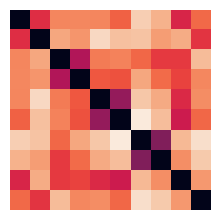

In [208]:
plt.grid("")
plt.axis("off")
plt.imshow(mat_euclidean)

Text(0.5, 0, 'Euclidean distance')

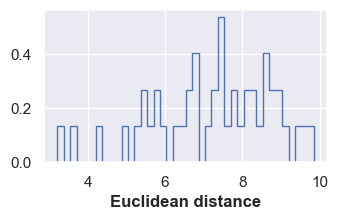

In [209]:
# Distribution of distances
distances_eucl = np.triu(mat_euclidean).reshape(-1)
distances_eucl = distances_eucl[distances_eucl != 0.0]
plt.hist(distances_eucl, histtype="step", bins=40, density=True);
plt.xlabel("Euclidean distance")

### Manhattan

In [210]:
mat_manhattan = cdist(np.stack(traces["std_phon_trace"]),np.stack(traces["std_phon_trace"]), metric="cityblock")

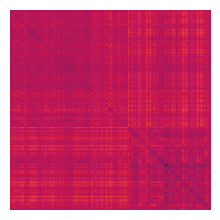

In [211]:
fig, ax = plt.subplots(figsize=default_style.SHORT_HALFSIZE_FIGURE)

plt.grid("")
plt.axis("off")
plt.imshow(mat_manhattan)

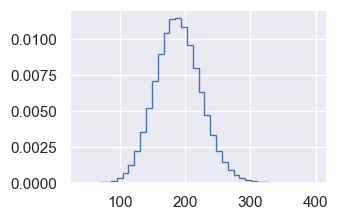

In [212]:
# Distribution of distances
fig, ax = plt.subplots(figsize=default_style.SHORT_HALFSIZE_FIGURE)

distances_man = np.triu(mat_manhattan).reshape(-1)
distances_man = distances_man[distances_man != 0.0]
plt.hist(distances_man, histtype="step", bins=40, density=True);

### DTW

In [213]:
from tslearn.metrics import cdist_dtw

mat_dtw = cdist_dtw(np.stack(traces["std_phon_trace"])[:10],np.stack(traces["std_phon_trace"])[:10], itakura_max_slope=2, n_jobs=-1)

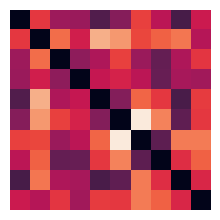

In [214]:
fig, ax = plt.subplots(figsize=default_style.SHORT_HALFSIZE_FIGURE)

plt.grid("")
plt.axis("off")
plt.imshow(mat_dtw)

## Kmeans

### Std phonetic (Euclidean)

In [215]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score, KernelKMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, adjusted_mutual_info_score as ami

In [216]:
X = np.stack(np.stack(traces["std_phon_trace"]))
print(np.stack(traces["std_phon_trace"]).shape)
print(X.shape)

(2452, 700)
(2452, 700)


C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.20241228480410073, 0.02674713034164326, 0.009658836921921614, 0.015498187257063627, -5.6761517548310585e-05, 0.013532329601527433, -0.00019190534794109163]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.17252064632685388, 0.03012069927435644, 0.006885084742355268, 0.01552051941591884, -0.0002231759688798083, 0.026496315052042835, -0.00014714221407281528]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16455416776980838, 0.03086056726574849, 0.019137591350277018, 0.06166347878161144, -0.00023895593231865314, 0.0332136827329706, 0.00011515125538776852]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16223335510598028, 0.037270374865501645, 0.01687976644480165, 0.055739328090362, -0.0005466082942579611, 0.04172987834779403, 0.0003625271035837585]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.14640530622395198, 0.04889498187363625, 0.02193583518652612, 0.05108420656297083, -0.00042474485680990765, 0.04779876607620689, 0.0014311667490559254]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1557797031303933, 0.04802686959221232, 0.02123808824116299, 0.052461756069950814, -0.0008165352424602747, 0.050555225067892985, 0.0013116326651986855]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15678582196330873, 0.052082771642217404, 0.018588438214816285, 0.05281758284265645, -0.0007105273634999253, 0.05614923308231937, 0.0027657652175686292]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1605238280765561, 0.05097492786388405, 0.01925000393311199, 0.05901890320238896, -0.0008928487038811556, 0.05817935674095746, 0.0027353991945583906]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15507690280795738, 0.04920285747559366, 0.017538954970018283, 0.06654879415158346, -0.0007024582585077896, 0.06092280703203899, 0.003527060055618169]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16611975226652073, 0.05471230317497527, 0.021763452689750017, 0.06014286044587926, 0.0005163227415000146, 0.06873476664474086, 0.005546393853239493]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16402023894221918, 0.052151114181933904, 0.017477585169917684, 0.06520390048724627, 0.0005294009562603002, 0.07271433525377605, 0.004102703333642845]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.18017210914503756, 0.05439004681025582, 0.016577469290012126, 0.0711919439478807, -0.0009065497023636632, 0.08165724359346889, 0.007768640794247956]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.17297802979261323, 0.05594567176908477, 0.018593736480258926, 0.07347262463210394, -0.0007043392460832765, 0.08432015153471042, 0.008762293881166089]



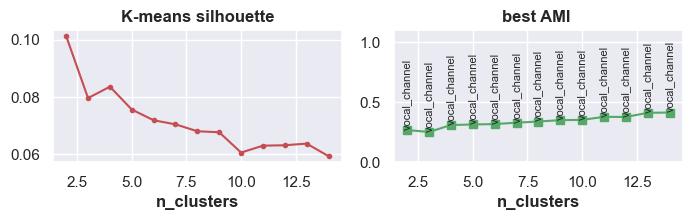

In [217]:
fig, axes = plt.subplot_mosaic([["sil", "ami"]], 
                              width_ratios=[1,  1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

sil_scores = []
amis = []
ns_clust = np.arange(2, 15)

for n in ns_clust:
    km = TimeSeriesKMeans(n_clusters=n, metric="euclidean", n_jobs=-1)
    km.fit(X)
    predictions = km.predict(X)
    sil_scores.append(silhouette_score(X, predictions, metric="euclidean", n_jobs=-1))
    
    ami_list = [ami(predictions, df[cat]) for cat in categorical_attributes]
    print(categorical_attributes)
    print(ami_list)
    print()
    amis.append(np.sum(ami_list))
    axes['ami'].annotate(f"{categorical_attributes[np.argmax(ami_list)]}",xy=(n, amis[-1]+0.02), ha="center", rotation=90, size=8)
    
axes["sil"].plot(ns_clust, sil_scores, label="silhouette", marker=".", color="r")
axes["ami"].plot(ns_clust, amis, label="sum AMI", marker="s", color="g")
axes["sil"].set_title('K-means silhouette')
axes["sil"].set_xlabel('n_clusters')
axes["ami"].set_title('best AMI ')
axes["ami"].set_xlabel('n_clusters')
axes['ami'].set_ylim(0, 1.1)
# axes['ami'].legend(loc="center", bbox_to_anchor=(0.6, 0.3))
fig.savefig("../images/ts_cluster_ami_sil_phon.pdf")

In [218]:
n_clusters = 6

km = TimeSeriesKMeans(n_clusters=n_clusters,
                      metric="euclidean",
                      verbose=False, 
                      n_jobs=-1)
km.fit_predict(X)

# fig, axes = plt.subplots(n_clusters,1,sharex=True, figsize=default_style.SHORT_FULLSIZE_FIGURE)

# for clus in range(n_clusters):
#     cluster_elements = X[km.labels_ == clus]
#     for i in range(5):
#         axes[clus].plot(cluster_elements[i], alpha=0.4, color="k")
#     axes[clus].set_yticks([])
#     axes[clus].plot(km.cluster_centers_[clus])
    
# df_ami = pd.DataFrame(columns=categorical_attributes)
# for cat in categorical_attributes:
#     print(cat, ami(km.labels_, df[cat]))
# plt.savefig("../images/ts_classification.pdf")

array([3, 1, 4, ..., 0, 5, 5], dtype=int64)

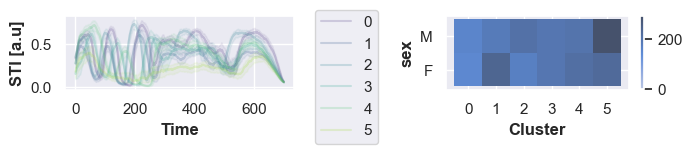

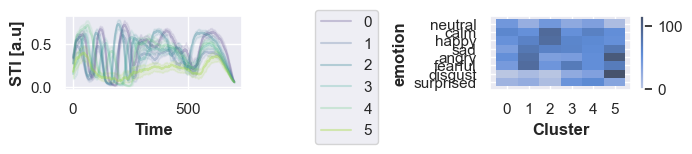

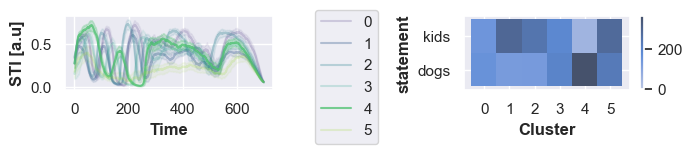

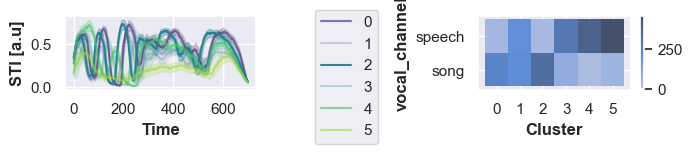

In [219]:
category = ['sex', 'emotion', 'statement', 'vocal_channel']

for cat in category:
    fig, axes = plt.subplot_mosaic([["t", "leg", "hist"]], 
                                  width_ratios=[1, 0.1, 1],
                                   figsize=default_style.BAND_FULLSIZE_FIGURE)

    colors=sns.color_palette("viridis", n_colors=n_clusters)

    for i in range(n_clusters):
        cluster_traces = np.where(km.labels_ == i)[0]

        alpha = min(5*np.abs(ami(km.labels_ == i, df[cat])) + 0.2, 1)

        low, mid, up = np.quantile(X[cluster_traces], [0.4, 0.5, 0.6], axis=0)
        axes["t"].plot(mid, color=colors[i], label=f"{i}", alpha=alpha)
        axes["t"].fill_between(np.arange(X.shape[1]),low, up, alpha=alpha/3, color=colors[i])

    sns.histplot(x=km.labels_.astype(int),bins=( list(np.arange(n_clusters+1) -0.01) ), 
                 y=df[cat],
                 cbar=True, cbar_kws=dict(shrink=.99))
    axes["hist"].set_xticks(np.arange(n_clusters)+0.5, labels=range(n_clusters));

    axes["t"].set_ylabel("STI [a.u]");
    axes["t"].set_xlabel("Time")
#     axes["t"].set_xticks([])
#     axes["t"].set_yticks([])
    fig.legend(loc="center", title="")

    axes["hist"].set_xlabel("Cluster")

    axes["leg"].axis("off")

    fig.savefig(f"../images/ts_cluster_counts_phon{cat}.pdf")

In [220]:
from sklearn.decomposition import PCA
from umap import UMAP

In [221]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [222]:
reducer = UMAP(n_components=2)
embedding = reducer.fit_transform(X)

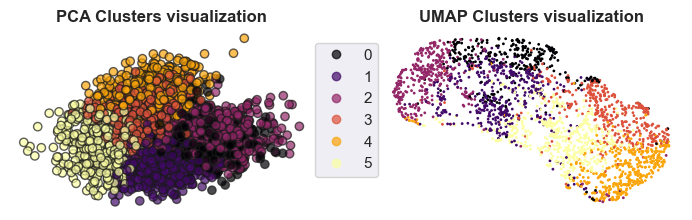

In [223]:
fig, axes = plt.subplot_mosaic([["pca", "leg", "umap"]], 
                              width_ratios=[1, 0.1, 1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

colors=sns.color_palette("inferno", n_colors=n_clusters)
axes["pca"].scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='inferno', edgecolor='k'
             , alpha=0.7)
axes['umap'].scatter(*embedding.T,s=1, c=km.labels_, cmap='inferno')

fig.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(km.labels_)), loc='center')

axes['pca'].set_title('PCA Clusters visualization')
axes['umap'].set_title('UMAP Clusters visualization')

axes["leg"].axis("off")
axes["pca"].axis("off")
axes["umap"].axis("off")
fig.savefig(f"../images/ts_cluster_visual_phon.pdf")

### Syllable_02 timeseries (euclidean)

In [224]:
X = traces["spectral_centroid"]
print(traces["spectral_centroid"].shape)
print(X.shape)

(2452, 54)
(2452, 54)


C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.02640842459574272, 0.028974779936964012, 0.03138132828490083, 0.0027448083499600493, -0.00013103305007375687, 0.11559993485757283, 0.2459052695375134]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.02198681540687777, 0.053910532029884516, 0.03881582305726299, 0.0009963594265193902, -0.00037235501781263596, 0.11880059721457466, 0.19663729515496703]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.017893639660754117, 0.056176575697698274, 0.028886585911286622, 0.19006830254482582, -0.00043078772813743253, 0.10640320207563125, 0.15341991170732236]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.03327726678945812, 0.05257717970909721, 0.022847930279421176, 0.13917272166057426, -0.0005410003279996385, 0.12917866632711528, 0.1670088098182176]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07291406388950039, 0.055692863985694355, 0.02383540084321732, 0.11709718296559311, -0.0005468037003724176, 0.14157154626368842, 0.17844821646544792]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07447385785732274, 0.05953568545563743, 0.021114230181237238, 0.12118418261270607, -0.0007698543768587898, 0.13287645748211663, 0.14663719593515948]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07691931014901655, 0.06398500689182747, 0.020502718274744182, 0.1114487067749075, -0.0005367298271693701, 0.14006134445386761, 0.14945473323721434]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07599616168438506, 0.05434802360620019, 0.02023755005093157, 0.1508775783241132, -0.0008035556161004004, 0.15426226571127746, 0.15177674594294346]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08495837132837122, 0.05568008620514847, 0.025045977075444984, 0.16613739279356865, -0.0009077426684350947, 0.1556714539084519, 0.15170608380804138]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07175496448599003, 0.059387243815007894, 0.023529156503655897, 0.1891421201891534, -0.0007163392551117343, 0.14100301553653305, 0.1314914359878152]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08649507764186158, 0.06541133374757847, 0.02302794066501939, 0.1412229970746131, -0.0006274613769635447, 0.15402914016128932, 0.14006235785957713]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08130834911201143, 0.07026457810287137, 0.019702673959075392, 0.151075829850343, -0.0010548301226646066, 0.1527419382119901, 0.1338268412866948]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07686231118550244, 0.057706780229370626, 0.02219386943259703, 0.14092783682558524, -0.0006781864734035562, 0.15362229360687335, 0.13218352513696524]



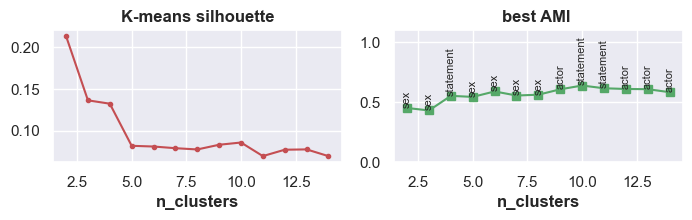

In [225]:
fig, axes = plt.subplot_mosaic([["sil", "ami"]], 
                              width_ratios=[1,  1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

sil_scores = []
amis = []
ns_clust = np.arange(2, 15)

for n in ns_clust:
    km = TimeSeriesKMeans(n_clusters=n, metric="euclidean", n_jobs=-1)
    km.fit(X)
    predictions = km.predict(X)
    sil_scores.append(silhouette_score(X, predictions, metric="euclidean", n_jobs=-1))
    
    ami_list = [ami(predictions, df[cat]) for cat in categorical_attributes]
    print(categorical_attributes)
    print(ami_list)
    print()
    amis.append(np.sum(ami_list))
    axes['ami'].annotate(f"{categorical_attributes[np.argmax(ami_list)]}",xy=(n, amis[-1]+0.02), ha="center", rotation=90, size=8)
    
axes["sil"].plot(ns_clust, sil_scores, label="silhouette", marker=".", color="r")
axes["ami"].plot(ns_clust, amis, label="sum AMI", marker="s", color="g")
axes["sil"].set_title('K-means silhouette')
axes["sil"].set_xlabel('n_clusters')
axes["ami"].set_title('best AMI ')
axes["ami"].set_xlabel('n_clusters')
axes['ami'].set_ylim(0, 1.1)
# axes['ami'].legend(loc="center", bbox_to_anchor=(0.6, 0.3))
fig.savefig("../images/ts_cluster_ami_sil_syll.pdf")

In [226]:
n_clusters = 5

km = TimeSeriesKMeans(n_clusters=n_clusters,
                      metric="euclidean",
                      verbose=False, 
                      n_jobs=-1)
km.fit_predict(X)

array([0, 0, 0, ..., 1, 3, 4], dtype=int64)

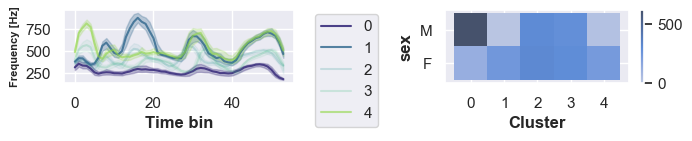

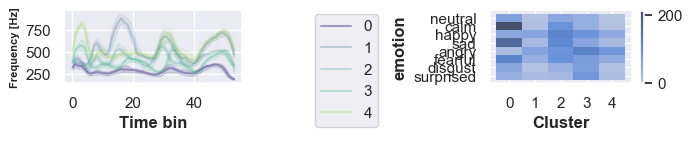

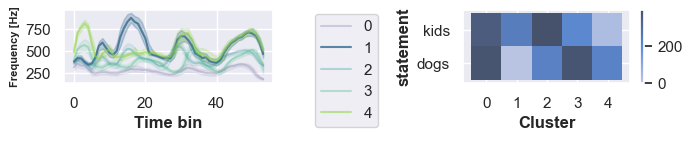

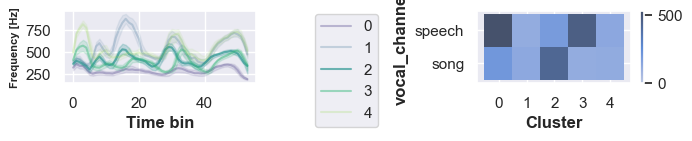

In [227]:
category = ['sex', 'emotion', 'statement', 'vocal_channel']

for cat in category:
    fig, axes = plt.subplot_mosaic([["t", "leg", "hist"]], 
                                  width_ratios=[1, 0.1, 1],  
                                  figsize=default_style.BAND_FULLSIZE_FIGURE)

    colors=sns.color_palette("viridis", n_colors=n_clusters)

    for i in range(n_clusters):
        cluster_traces = np.where(km.labels_ == i)[0]

        alpha = min(5*np.abs(ami(km.labels_ == i, df[cat])) + 0.2, 1)

        low, mid, up = np.quantile(X[cluster_traces], [0.4, 0.5, 0.6], axis=0)
        axes["t"].plot(mid, color=colors[i], label=f"{i}", alpha=alpha)
        axes["t"].fill_between(np.arange(X.shape[1]),low, up, alpha=alpha/3, color=colors[i])

    sns.histplot(x=km.labels_.astype(int),bins=( list(np.arange(n_clusters+1) -0.01) ), 
                 y=df[cat],
                 cbar=True, cbar_kws=dict(shrink=.99))
    axes["hist"].set_xticks(np.arange(n_clusters)+0.5, labels=range(n_clusters));

    axes["t"].set_ylabel("Frequency [Hz]", size=8);
    axes["t"].set_xlabel("Time bin")
    fig.legend(loc="center", title="")

    axes["hist"].set_xlabel("Cluster")

    axes["leg"].axis("off")

    fig.savefig(f"../images/ts_cluster_counts_syll{cat}.pdf")

In [228]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [229]:
reducer = UMAP(n_components=2)
embedding = reducer.fit_transform(X)

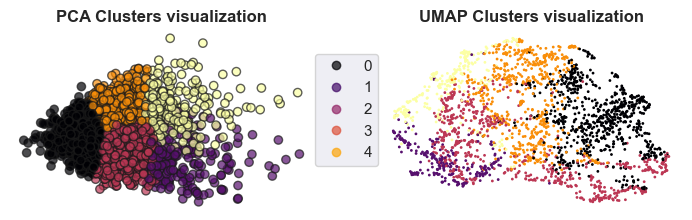

In [230]:
fig, axes = plt.subplot_mosaic([["pca", "leg", "umap"]], 
                              width_ratios=[1, 0.1, 1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

colors=sns.color_palette("inferno", n_colors=n_clusters)
axes["pca"].scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='inferno', edgecolor='k'
             , alpha=0.7)
axes['umap'].scatter(*embedding.T,s=1, c=km.labels_, cmap='inferno')

fig.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(km.labels_)), loc='center')

axes['pca'].set_title('PCA Clusters visualization')
axes['umap'].set_title('UMAP Clusters visualization')

axes["leg"].axis("off")
axes["pca"].axis("off")
axes["umap"].axis("off")
fig.savefig(f"../images/ts_cluster_visual_syll.pdf")

## Features clustering 

## phonetic

In [231]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from scipy.signal import find_peaks

In [232]:
X = np.stack(traces['std_phon_trace'])


In [233]:
def calculate_features(values):
    peaks = find_peaks(values, distance=3, prominence=[0.20,10])
    features = {
        'peaks':len(peaks[0]),
        'min': np.min(values),
        'max': np.max(values),
        'avg': np.mean(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '80p': np.percentile(values, 80),
        
    }

    return features

In [234]:
F = [list(calculate_features(x).values()) for x in X]

C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1943515740077279, 0.026199471172484917, 0.010225405696971848, 0.014669346337968653, 1.4022200731786128e-05, 0.01484078787792435, -0.0002701517621530553]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.17598735085171158, 0.031316004560380285, 0.02018718765306172, 0.05974548974174464, -0.0003038998124516068, 0.02186780908470529, -0.00012103942250529222]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15867185317488008, 0.033379612787062134, 0.017752606336691002, 0.059149281443068955, -0.0004727157326288302, 0.03422836716844856, -0.0001700712866647639]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1601425847701666, 0.03410223194687182, 0.020755107132755718, 0.058766103564597896, -0.00048820957477475814, 0.03911364870874675, 0.0015687113998554528]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15316695090881938, 0.049458312480015774, 0.024167203658284012, 0.055878010606766004, -0.0003503672351949059, 0.04715625538681612, 0.00011038873807708322]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1577153621102606, 0.04236884850288004, 0.012842533379041371, 0.0628119295263069, -0.0007929811519398352, 0.04723818582745037, -0.0005074552825374558]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.14587909461775228, 0.04873576326366726, 0.02463752130359657, 0.06066833213483646, -0.0005764191949557696, 0.05088197908556571, 0.0011147385536956387]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16001526040473907, 0.05144839605377628, 0.021830320946635708, 0.06155294454896436, -0.0008212807095149326, 0.056701097899273925, 0.003277841597656929]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1665740081383745, 0.053242548914203124, 0.017584886668069514, 0.06809640286498589, -0.0003570989641756484, 0.06460780749833057, 0.0055023083580663275]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1553052337815993, 0.04768197006238323, 0.01701841210517873, 0.06622186945845923, -0.0005741716102960944, 0.07307628475173794, 0.0032143262636635302]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15347638660707943, 0.045746759550073346, 0.017775977049466037, 0.04536702341323079, -0.00020680213858189015, 0.08556917164185134, 0.009513922305095067]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1658948712983067, 0.050533035747894306, 0.017234702972301705, 0.06949252003736428, -0.0006535699620960937, 0.08360741130741223, 0.006788777556859357]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1548737662064437, 0.05273663725171297, 0.018111090353216078, 0.07093846564142012, -0.0005768520236664731, 0.08544728924640206, 0.010482839432932739]



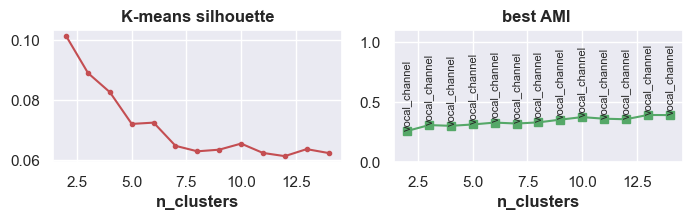

In [235]:
fig, axes = plt.subplot_mosaic([["sil", "ami"]], 
                              width_ratios=[1,  1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

sil_scores = []
amis = []
ns_clust = np.arange(2, 15)

for n in ns_clust:
    km = TimeSeriesKMeans(n_clusters=n, metric="euclidean", n_jobs=-1)
    km.fit(X)
    predictions = km.predict(X)
    sil_scores.append(silhouette_score(X, predictions, metric="euclidean", n_jobs=-1))
    
    ami_list = [ami(predictions, df[cat]) for cat in categorical_attributes]
    print(categorical_attributes)
    print(ami_list)
    print()
    amis.append(np.sum(ami_list))
    axes['ami'].annotate(f"{categorical_attributes[np.argmax(ami_list)]}",xy=(n, amis[-1]+0.02), ha="center", rotation=90, size=8)
    
axes["sil"].plot(ns_clust, sil_scores, label="silhouette", marker=".", color="r")
axes["ami"].plot(ns_clust, amis, label="sum AMI", marker="s", color="g")
axes["sil"].set_title('K-means silhouette')
axes["sil"].set_xlabel('n_clusters')
axes["ami"].set_title('best AMI ')
axes["ami"].set_xlabel('n_clusters')
axes['ami'].set_ylim(0, 1.1)
# axes['ami'].legend(loc="center", bbox_to_anchor=(0.6, 0.3))
fig.savefig("../images/ts_features_ami_sil_phon.pdf")

In [236]:
n_clusters = 5


km = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
km.fit(F)



KMeans(max_iter=100, n_clusters=5, n_init=10)

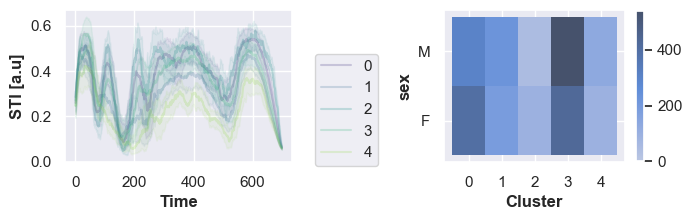

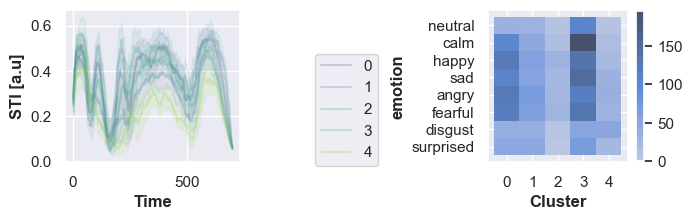

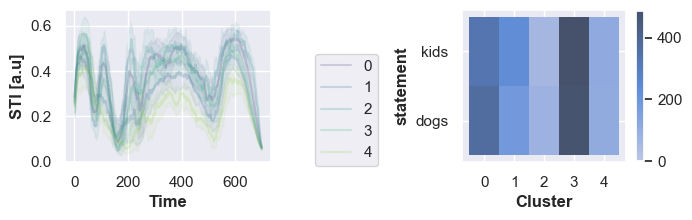

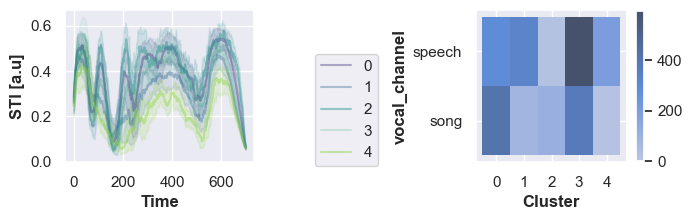

In [237]:
category = ['sex', 'emotion', 'statement', 'vocal_channel']

for cat in category:
    fig, axes = plt.subplot_mosaic([["t", "leg", "hist"]], 
                                  width_ratios=[1, 0.1, 1],  
                                  figsize=default_style.SHORT_FULLSIZE_FIGURE)

    colors=sns.color_palette("viridis", n_colors=n_clusters)

    for i in range(n_clusters):
        cluster_traces = np.where(km.labels_ == i)[0]

        alpha = min(5*np.abs(ami(km.labels_ == i, df[cat])) + 0.2, 1)

        low, mid, up = np.quantile(X[cluster_traces], [0.4, 0.5, 0.6], axis=0)
        axes["t"].plot(mid, color=colors[i], label=f"{i}", alpha=alpha)
        axes["t"].fill_between(np.arange(X.shape[1]),low, up, alpha=alpha/3, color=colors[i])

    sns.histplot(x=km.labels_.astype(int),bins=( list(np.arange(n_clusters+1) -0.01) ), 
                 y=df[cat],
                 cbar=True, cbar_kws=dict(shrink=.99))
    axes["hist"].set_xticks(np.arange(n_clusters)+0.5, labels=range(n_clusters));

    axes["t"].set_ylabel("STI [a.u]");
    axes["t"].set_xlabel("Time")
    fig.legend(loc="center", title="")

    axes["hist"].set_xlabel("Cluster")

    axes["leg"].axis("off")

    fig.savefig(f"../images/ts_features_counts_phon{cat}.pdf")

In [238]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [239]:
reducer = UMAP(n_components=2)
embedding = reducer.fit_transform(X)

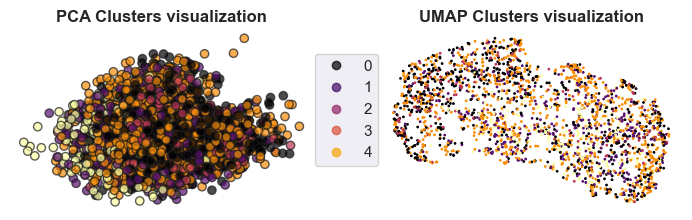

In [240]:
fig, axes = plt.subplot_mosaic([["pca", "leg", "umap"]], 
                              width_ratios=[1, 0.1, 1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

colors=sns.color_palette("inferno", n_colors=n_clusters)
axes["pca"].scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='inferno', edgecolor='k'
             , alpha=0.7)
axes['umap'].scatter(*embedding.T,s=1, c=km.labels_, cmap='inferno')

fig.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(km.labels_)), loc='center')

axes['pca'].set_title('PCA Clusters visualization')
axes['umap'].set_title('UMAP Clusters visualization')

axes["leg"].axis("off")
axes["pca"].axis("off")
axes["umap"].axis("off")
fig.savefig(f"../images/ts_features_visual_phon.pdf")

## Syllables_02

In [241]:
X = np.stack(traces['spectral_centroid'])

In [242]:
F = [list(calculate_features(x).values()) for x in X]

C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.02640842459574272, 0.02897477993696401, 0.03138132828490083, 0.0027448083499600484, -0.00013103305007375744, 0.11559993485757282, 0.2459052695375134]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.022091304081201375, 0.05343210685394697, 0.038397134250220226, 0.0012013262661215707, -0.00038408984442844015, 0.11965558829141827, 0.1985400415726625]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.018823662951652418, 0.05841078765827069, 0.028690468767895227, 0.17891551858226706, -0.0004446229792798173, 0.10560588019885844, 0.15308790525525193]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.037770105614741846, 0.05263069756395173, 0.022420802005389796, 0.1443714475561008, -0.0006380543717758757, 0.1275522318100028, 0.1688986793750838]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07053314098797794, 0.056555869540021605, 0.022295771119078493, 0.11628479366572289, -0.0005369094789370323, 0.14635594487181353, 0.18222781268552304]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07963407351515862, 0.062078019735925985, 0.022060038984847197, 0.10875822781705907, -0.0005156338176658614, 0.13740985549075105, 0.16054288258159338]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.0809487332006808, 0.06010076542352436, 0.023948252255848144, 0.16761734303128065, -0.00040559254522496113, 0.131236965406052, 0.13160991743836528]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08248770756630196, 0.06186760543393971, 0.022664433899843493, 0.14790428126087776, -0.00047877946692829717, 0.14697293451337867, 0.14095676803645255]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08035147185577395, 0.06221056650175247, 0.01978221435428562, 0.1333832526133662, -0.0008180334950898657, 0.15174704690359467, 0.14494117001803963]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08110238034702923, 0.058414033183328766, 0.021211381369945322, 0.16261974106005, -0.0009830582052401387, 0.15363173350785858, 0.1456365905315996]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.0783499158631885, 0.06815537594700553, 0.020086127199503298, 0.14296838234254067, -0.0009009875053605765, 0.1537418204541988, 0.1401805333906066]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08922566317099655, 0.06274616504175563, 0.018171760338867457, 0.16617174771537793, -0.0009184736349609327, 0.15773318517768503, 0.14470572492385572]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.0830239009870368, 0.0645793801091647, 0.02366686303628033, 0.16253402630532712, -0.001085980653180541, 0.15291380465765345, 0.13461262481270916]



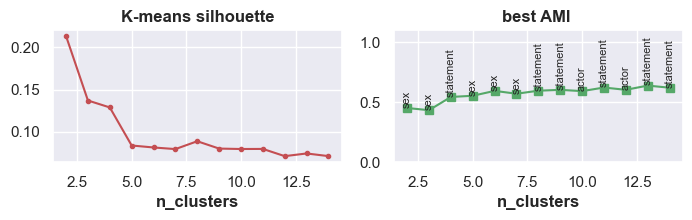

In [243]:
fig, axes = plt.subplot_mosaic([["sil", "ami"]], 
                              width_ratios=[1,  1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

sil_scores = []
amis = []
ns_clust = np.arange(2, 15)

for n in ns_clust:
    km = TimeSeriesKMeans(n_clusters=n, metric="euclidean", n_jobs=-1)
    km.fit(X)
    predictions = km.predict(X)
    sil_scores.append(silhouette_score(X, predictions, metric="euclidean", n_jobs=-1))
    
    ami_list = [ami(predictions, df[cat]) for cat in categorical_attributes]
    print(categorical_attributes)
    print(ami_list)
    print()
    amis.append(np.sum(ami_list))
    axes['ami'].annotate(f"{categorical_attributes[np.argmax(ami_list)]}",xy=(n, amis[-1]+0.02), ha="center", rotation=90, size=8)
    
axes["sil"].plot(ns_clust, sil_scores, label="silhouette", marker=".", color="r")
axes["ami"].plot(ns_clust, amis, label="sum AMI", marker="s", color="g")
axes["sil"].set_title('K-means silhouette')
axes["sil"].set_xlabel('n_clusters')
axes["ami"].set_title('best AMI ')
axes["ami"].set_xlabel('n_clusters')
axes['ami'].set_ylim(0, 1.1)
# axes['ami'].legend(loc="center", bbox_to_anchor=(0.6, 0.3))
fig.savefig("../images/ts_features_ami_sil_syll.pdf")

In [244]:
n_clusters = 5


km = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
km.fit(F)

KMeans(max_iter=100, n_clusters=5, n_init=10)

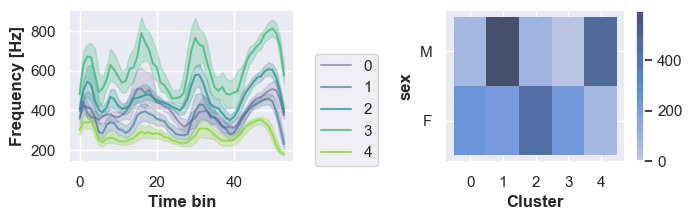

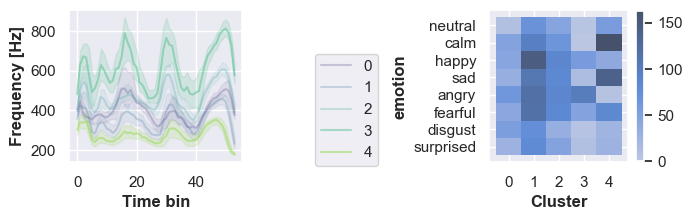

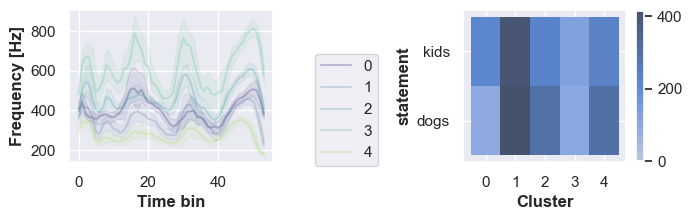

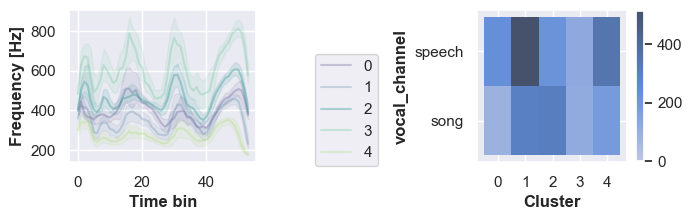

In [245]:
category = ['sex', 'emotion', 'statement', 'vocal_channel']

for cat in category:
    fig, axes = plt.subplot_mosaic([["t", "leg", "hist"]], 
                                  width_ratios=[1, 0.1, 1],  
                                  figsize=default_style.SHORT_FULLSIZE_FIGURE)

    colors=sns.color_palette("viridis", n_colors=n_clusters)

    for i in range(n_clusters):
        cluster_traces = np.where(km.labels_ == i)[0]

        alpha = min(5*np.abs(ami(km.labels_ == i, df[cat])) + 0.2, 1)

        low, mid, up = np.quantile(X[cluster_traces], [0.4, 0.5, 0.6], axis=0)
        axes["t"].plot(mid, color=colors[i], label=f"{i}", alpha=alpha)
        axes["t"].fill_between(np.arange(X.shape[1]),low, up, alpha=alpha/3, color=colors[i])

    sns.histplot(x=km.labels_.astype(int),bins=( list(np.arange(n_clusters+1) -0.01) ), 
                 y=df[cat],
                 cbar=True, cbar_kws=dict(shrink=.99))
    axes["hist"].set_xticks(np.arange(n_clusters)+0.5, labels=range(n_clusters));

    axes["t"].set_ylabel("Frequency [Hz]");
    axes["t"].set_xlabel("Time bin")
    fig.legend(loc="center", title="")

    axes["hist"].set_xlabel("Cluster")

    axes["leg"].axis("off")

    fig.savefig(f"../images/ts_features_counts_syll{cat}.pdf")

In [246]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [247]:
reducer = UMAP(n_components=2)
embedding = reducer.fit_transform(X)

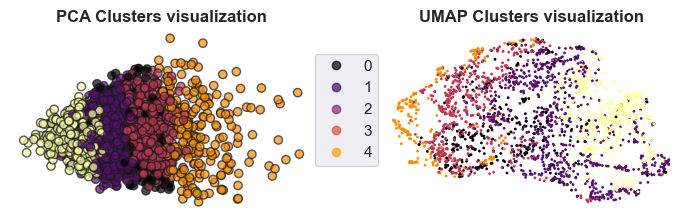

In [248]:
fig, axes = plt.subplot_mosaic([["pca", "leg", "umap"]], 
                              width_ratios=[1, 0.1, 1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

colors=sns.color_palette("inferno", n_colors=n_clusters)
axes["pca"].scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='inferno', edgecolor='k'
             , alpha=0.7)
axes['umap'].scatter(*embedding.T,s=1, c=km.labels_, cmap='inferno')

fig.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(km.labels_)), loc='center')

axes['pca'].set_title('PCA Clusters visualization')
axes['umap'].set_title('UMAP Clusters visualization')

axes["leg"].axis("off")
axes["pca"].axis("off")
axes["umap"].axis("off")
fig.savefig(f"../images/ts_features_visual_syll.pdf")